In [47]:
#import numpy as np
import glob
from PIL import Image, ImageOps
import autograd.numpy as np
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [48]:
def load_image(fname):
    img = Image.open(fname).resize((32, 32))
    img_gray = img.convert('L')
    img_eq = ImageOps.autocontrast(img_gray)
    img_eq = np.array(img_eq.getdata()).reshape((img_eq.size[1], -1))
    return img_eq

In [49]:
def binarize_image(img_eq):
    img_bin = np.copy(img_eq)
    img_bin[img_bin < 128] = -1
    img_bin[img_bin >= 128] = 1
    return img_bin

In [50]:
def add_corruption(img):
    img = img.reshape((32, 32))
    t = np.random.choice(3)
    if t == 0:
        i = np.random.randint(32)
        img[i:(i + 8)] = -1
    elif t == 1:
        i = np.random.randint(32)
        img[:, i:(i + 8)] = -1
    else:
        mask = np.sum([np.diag(-np.ones(32 - np.abs(i)), i)
                       for i in np.arange(-4, 5)], 0).astype(np.int)
        img[mask == -1] = -1
    return img.ravel()

In [51]:
def recover(cimgs, W, b):
    img_size = np.prod(cimgs[0].shape)
    ######################################################################
    ######################################################################
    rimgs = []
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
    #######################################################################
    #######################################################################
    rimgs = cimgs.copy()
    num_iter = 20
    for i in range(num_iter):
        for j in range(len(rimgs)):
            rimgs[j] = ((np.sign(1/(1+np.exp(-(Wh.dot(rimgs[j])+bh)))-0.5))).astype(int)
    rimgs = rimgs.reshape((len(rimgs),32,32))
    return rimgs

In [52]:
def learn_hebbian(imgs):
    img_size = np.prod(imgs[0].shape)
    ######################################################################
    ######################################################################
    weights = np.zeros((img_size, img_size))
    bias = np.zeros(img_size)
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
    
    #flatten image
    imgs_f = np.reshape(imgs,(len(imgs),img_size))
    
    for img in imgs_f:
        outer = np.outer(img,img)
        weights += outer
    diagW = np.diag(np.diag(weights))
    weights = weights - diagW
    weights /= len(imgs)
    
    
    #######################################################################
    #######################################################################
    return weights, bias

In [81]:
#Autograd
import autograd.numpy as np
from autograd import grad, jacobian, hessian
from autograd.scipy.stats import norm
from scipy.optimize import minimize

def learn_maxpl(imgs):
    
    img_size = np.prod(imgs[0].shape)
    ######################################################################
    ######################################################################
    weights = np.zeros((img_size, img_size))
    bias = np.zeros(img_size)
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
    
    # Define PseudoLikelihood function
    def log_PL(teta):
        SUM=0
        imgs_f = imgs.reshape((len(imgs),img_size))
        for i in imgs_f:
            for j in range(len(i)):
                SUM=SUM+np.log(1/(1+np.exp(-(np.dot(teta[j*img_size:(j+1)*img_size].transpose(),i)+teta[(len(imgs_f))*img_size+j]))))*(i[j]/2+0.5)+(1-np.log(1/(1+np.exp(-(np.dot(teta[j*img_size:(j+1)*img_size].transpose(),i)+teta[(len(imgs_f))*img_size+j])))))*(-i[j]/2+0.5) 
        return SUM
          
        
    #######################################################################
    #######################################################################
    x0 = np.ones((1024*1025,1))#np.concatenate((np.ones((1024*1024,1)),np.zeros((1024,1))),axis = 0)
    d_teta=grad(log_PL,0)
    num_iter = 5
    alpha = 1000
    for i in range(num_iter):
        dx = d_teta(x0)
        print(np.sum(dx>0.01))
        x0 += dx*alpha
        print(x0)
    
    
    return x0[:img_size*img_size].reshape((img_size,img_size)), x0[img_size*img_size:].transpose()#weights, bias

In [82]:
# Recover 2 -- Hebbian
Wh, bh = learn_maxpl(imgs)
print(Wh.shape,bh.shape)
rimgs_h = recover(cimgs, Wh, bh)


0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
(1024, 1024) (1, 1024)


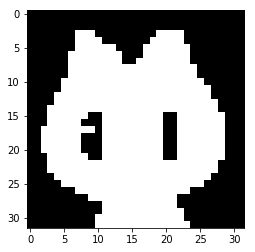

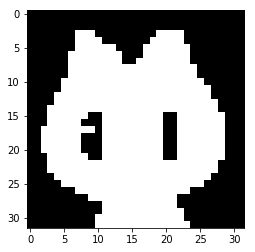

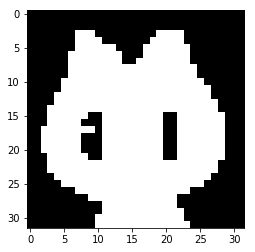

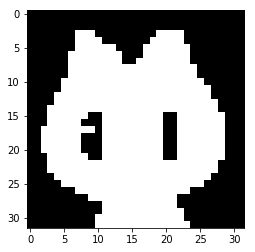

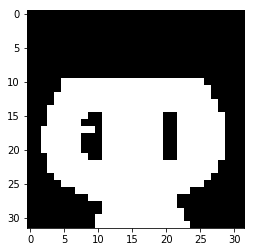

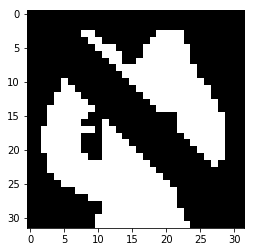

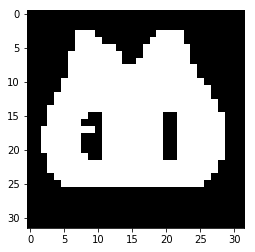

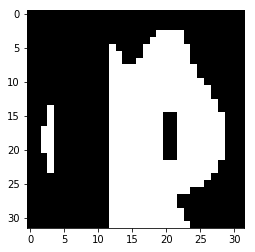

In [66]:
# Load Images and Binarize
ifiles = sorted(glob.glob('images/*'))
timgs = [load_image(ifile) for ifile in ifiles]
imgs = np.asarray([binarize_image(img) for img in timgs])
# Add corruption
cimgs = []
for i, img in enumerate(imgs):
    cimgs.append(add_corruption(np.copy(imgs[i])))
cimgs = np.asarray(cimgs)

for i in imgs:
    plt.imshow(i, cmap='gray')
    plt.show()

for i in cimgs:
    plt.imshow(i.reshape((32,32)), cmap='gray')
    plt.show()

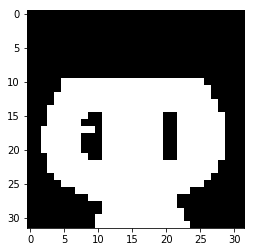

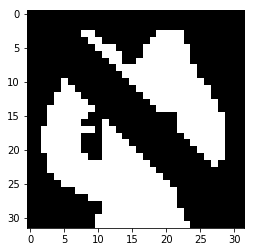

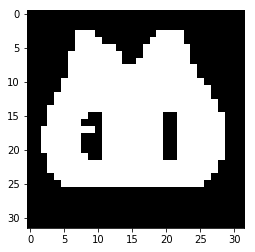

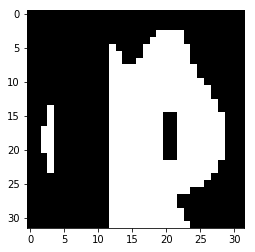

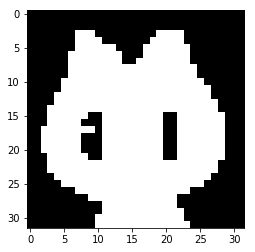

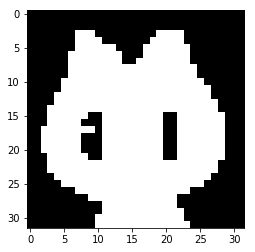

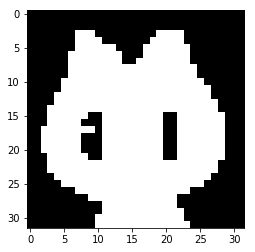

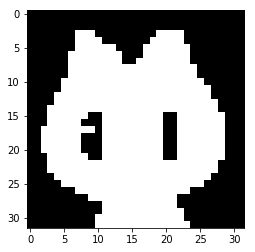

In [67]:
# Recover 1 -- Hebbian
Wh, bh = learn_hebbian(imgs)
rimgs_h = recover(cimgs, Wh, bh)
np.save('hebbian.npy', rimgs_h)

import matplotlib.pyplot as plt
from IPython.display import display


for i in cimgs:
    plt.imshow(i.reshape((32,32)), cmap='gray')
    plt.show()

for i in rimgs_h:
    plt.imshow(i.reshape((32,32)), cmap='gray')
    plt.show()

0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
0
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


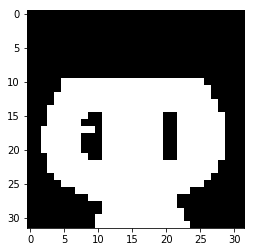

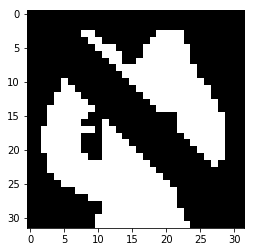

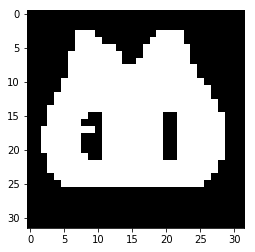

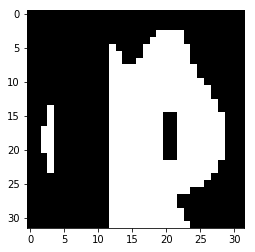

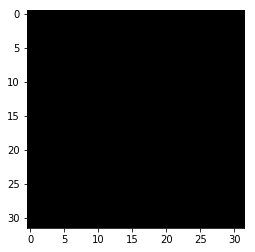

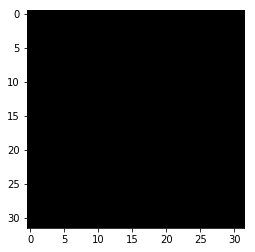

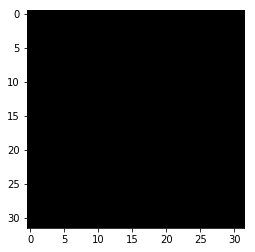

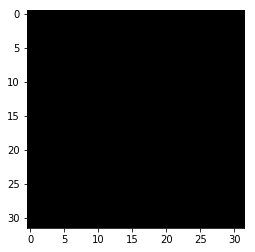

In [68]:
# Recover 2 -- Hebbian
Wh, bh = learn_maxpl(imgs)
rimgs_h = recover(cimgs, Wh, bh)
np.save('hebbian.npy', rimgs_h)

import matplotlib.pyplot as plt
from IPython.display import display


for i in cimgs:
    plt.imshow(i.reshape((32,32)), cmap='gray')
    plt.show()

for i in rimgs_h:
    plt.imshow(i.reshape((32,32)), cmap='gray')
    plt.show()

In [78]:
def log_PL(teta):
        SUM=0
        ifiles = sorted(glob.glob('images/*'))
        timgs = [load_image(ifile) for ifile in ifiles]
        imgs = np.asarray([binarize_image(img) for img in timgs])
        img_size = np.prod(imgs[0].shape)
        imgs_f = imgs.reshape((len(imgs),img_size))
        for i in imgs_f:
            for j in range(len(i)):
                SUM=SUM+np.log(1/(1+np.exp(-(np.dot(teta[j*img_size:(j+1)*img_size].transpose(),i)+teta[(len(imgs_f))*img_size+j]))))*(i[j]/2+0.5)+(1-np.log(1/(1+np.exp(-(np.dot(teta[j*img_size:(j+1)*img_size].transpose(),i)+teta[(len(imgs_f))*img_size+j])))))*(-i[j]/2+0.5) 
        return SUM
    
teta = np.ones((1024*1025,1))
log_PL(teta)

array([-12712.])

In [79]:
d_teta=grad(log_PL)

In [80]:
import numpy
teta = np.random.rand(1024*1025,1)
print(d_teta(teta))

[[-4.]
 [-4.]
 [-4.]
 ...
 [ 0.]
 [ 0.]
 [ 0.]]
